# Hackathon

In [152]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


## Loading the data

In [153]:
#reading data
df_travel=pd.read_csv("Traveldata_train.csv")
df_survey=pd.read_csv("Surveydata_train.csv")

#saving copy
data_travel_copy=df_travel.copy()
data_survey_copy=df_survey.copy()

## Reality checks

In [154]:
print(df_travel.info())
print(df_survey.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94379 entries, 0 to 94378
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       94379 non-null  int64  
 1   Gender                   94302 non-null  object 
 2   Customer_Type            85428 non-null  object 
 3   Age                      94346 non-null  float64
 4   Type_Travel              85153 non-null  object 
 5   Travel_Class             94379 non-null  object 
 6   Travel_Distance          94379 non-null  int64  
 7   Departure_Delay_in_Mins  94322 non-null  float64
 8   Arrival_Delay_in_Mins    94022 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 6.5+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94379 entries, 0 to 94378
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   ID         

In [155]:
df_survey["Overall_Experience"]=df_survey["Overall_Experience"].astype("object")
df_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94379 entries, 0 to 94378
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   ID                       94379 non-null  int64 
 1   Overall_Experience       94379 non-null  object
 2   Seat_Comfort             94318 non-null  object
 3   Seat_Class               94379 non-null  object
 4   Arrival_Time_Convenient  85449 non-null  object
 5   Catering                 85638 non-null  object
 6   Platform_Location        94349 non-null  object
 7   Onboard_Wifi_Service     94349 non-null  object
 8   Onboard_Entertainment    94361 non-null  object
 9   Online_Support           94288 non-null  object
 10  Ease_of_Online_Booking   94306 non-null  object
 11  Onboard_Service          86778 non-null  object
 12  Legroom                  94289 non-null  object
 13  Baggage_Handling         94237 non-null  object
 14  CheckIn_Service          94302 non-nul

### Taking a look on the data:

#### Travel: 

In [156]:
df_travel.head()

,ID,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins
0,98800001,Female,Loyal Customer,52.0,NaN,Business,272,0.0,5.0
1,98800002,Male,Loyal Customer,48.0,Personal Travel,Eco,2200,9.0,0.0
2,98800003,Female,Loyal Customer,43.0,Business Travel,Business,1061,77.0,119.0
3,98800004,Female,Loyal Customer,44.0,Business Travel,Business,780,13.0,18.0
4,98800005,Female,Loyal Customer,50.0,Business Travel,Business,1981,0.0,0.0


In [157]:
df_travel.tail()

,ID,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins
94374,98894375,Male,Loyal Customer,32.0,Business Travel,Business,1357,83.0,125.0
94375,98894376,Male,Loyal Customer,44.0,Business Travel,Business,592,5.0,11.0
94376,98894377,Male,NaN,63.0,Business Travel,Business,2794,0.0,0.0
94377,98894378,Male,Loyal Customer,16.0,Personal Travel,Eco,2744,0.0,0.0
94378,98894379,Male,Loyal Customer,54.0,NaN,Eco,2107,28.0,28.0


In [158]:
df_travel.sample(10)

,ID,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins
54116,98854117,Male,Loyal Customer,29.0,Personal Travel,Eco,2703,25.0,12.0
12438,98812439,Female,Loyal Customer,13.0,NaN,Eco,1856,0.0,21.0
43422,98843423,Female,Loyal Customer,10.0,Personal Travel,Eco,1260,0.0,3.0
62915,98862916,Female,Loyal Customer,47.0,Business Travel,Business,2670,0.0,0.0
6111,98806112,Female,Loyal Customer,42.0,NaN,Business,275,2.0,4.0
17439,98817440,Male,Loyal Customer,54.0,Business Travel,Business,1665,0.0,0.0
36828,98836829,Female,Loyal Customer,43.0,Business Travel,Business,3494,0.0,11.0
5778,98805779,Male,Loyal Customer,37.0,Personal Travel,Eco,1496,0.0,0.0
58711,98858712,Female,Loyal Customer,25.0,Business Travel,Business,5076,30.0,22.0
89617,98889618,Female,Disloyal Customer,35.0,Business Travel,Eco,1885,0.0,0.0


#### Survey:

In [159]:
df_survey.head()

,ID,Overall_Experience,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
0,98800001,0,Needs Improvement,Green Car,Excellent,Excellent,Very Convenient,Good,Needs Improvement,Acceptable,Needs Improvement,Needs Improvement,Acceptable,Needs Improvement,Good,Needs Improvement,Poor
1,98800002,0,Poor,Ordinary,Excellent,Poor,Needs Improvement,Good,Poor,Good,Good,Excellent,Needs Improvement,Poor,Needs Improvement,Good,Good
2,98800003,1,Needs Improvement,Green Car,Needs Improvement,Needs Improvement,Needs Improvement,Needs Improvement,Good,Excellent,Excellent,Excellent,Excellent,Excellent,Good,Excellent,Excellent
3,98800004,0,Acceptable,Ordinary,Needs Improvement,NaN,Needs Improvement,Acceptable,Needs Improvement,Acceptable,Acceptable,Acceptable,Acceptable,Acceptable,Good,Acceptable,Acceptable
4,98800005,1,Acceptable,Ordinary,Acceptable,Acceptable,Manageable,Needs Improvement,Good,Excellent,Good,Good,Good,Good,Good,Good,Good


In [160]:
df_survey.tail()

,ID,Overall_Experience,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
94374,98894375,0,Poor,Ordinary,Good,Good,Convenient,Poor,Poor,Poor,Poor,Good,Good,Good,Needs Improvement,Good,Poor
94375,98894376,1,Good,Ordinary,Good,Good,Convenient,Needs Improvement,Excellent,Excellent,Acceptable,Acceptable,Acceptable,Acceptable,Good,Acceptable,Good
94376,98894377,1,Needs Improvement,Green Car,Needs Improvement,Needs Improvement,Needs Improvement,Good,Excellent,Good,Good,Good,Good,Good,Acceptable,Good,Acceptable
94377,98894378,0,Needs Improvement,Ordinary,NaN,Needs Improvement,Convenient,Good,Needs Improvement,Good,Good,Acceptable,Good,Good,Good,Excellent,Good
94378,98894379,0,Acceptable,Ordinary,Poor,Acceptable,Manageable,Acceptable,Acceptable,Acceptable,Acceptable,Poor,Good,Good,Poor,Good,Acceptable


In [161]:
df_survey.sample(10)

,ID,Overall_Experience,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
12052,98812053,0,Needs Improvement,Green Car,Acceptable,Acceptable,Manageable,Needs Improvement,Poor,Needs Improvement,Needs Improvement,Acceptable,Acceptable,Good,Good,Acceptable,Needs Improvement
820,98800821,1,Good,Green Car,Good,Excellent,Convenient,Excellent,Excellent,Excellent,Excellent,Needs Improvement,Acceptable,Poor,Needs Improvement,Acceptable,Excellent
80377,98880378,0,Needs Improvement,Ordinary,NaN,Good,Convenient,Needs Improvement,Acceptable,Acceptable,Needs Improvement,Needs Improvement,Needs Improvement,Needs Improvement,Poor,Needs Improvement,Acceptable
84762,98884763,1,Poor,Green Car,Poor,Poor,Inconvenient,Good,Good,Excellent,Good,Good,Good,Good,Acceptable,Good,Acceptable
79536,98879537,1,Needs Improvement,Ordinary,NaN,Needs Improvement,Needs Improvement,Good,Good,Good,Good,Good,Good,Good,Acceptable,Good,Good
64680,98864681,1,Poor,Green Car,Poor,Poor,Inconvenient,Excellent,Excellent,Good,Good,Good,Good,Good,Excellent,Good,Acceptable
17170,98817171,1,Needs Improvement,Ordinary,Needs Improvement,Needs Improvement,Needs Improvement,Acceptable,Acceptable,Excellent,Good,Good,Good,Good,Acceptable,Good,Good
67731,98867732,1,Good,Ordinary,NaN,Good,Manageable,Excellent,Good,Excellent,Excellent,Acceptable,Excellent,Excellent,Excellent,Excellent,Excellent
3084,98803085,1,Excellent,Ordinary,Excellent,Excellent,Very Convenient,Good,Good,Good,Good,Acceptable,Good,Good,Good,Excellent,Good
50104,98850105,0,Good,Green Car,Acceptable,Good,Convenient,Good,Good,Good,Good,Poor,Good,Good,Good,Poor,Good


### Respondiendo dudas sobre  las bases:

In [162]:
print("shape travel:",df_travel.shape,"\n shape de survey:",df_survey.shape)

shape travel: (94379, 9) 
 shape de survey: (94379, 17)


In [163]:
print("cant de usuarios unicos en travel:",df_travel["ID"].nunique())
print("cant de usurios unicos en survey:",df_survey["ID"].nunique())

cant de usuarios unicos en travel: 94379
cant de usurios unicos en survey: 94379


In [164]:
id_unicos_survey=set(df_survey["ID"].unique())
id_unicos_travel=set(df_travel["ID"].unique())

union_ids=id_unicos_survey.union(id_unicos_travel)
intersection_ids= id_unicos_survey.intersection(id_unicos_travel)

print("Los usuarios de travel son los mismos de survey ? ",union_ids==intersection_ids)

Los usuarios de travel son los mismos de survey ?  True


In [165]:
#Verificando duplicados en general
print("hay rows duplicadas en survey?: ",df_survey.duplicated().any())
print("hay rows duplicadas en travel?: ",df_travel.duplicated().any())

hay rows duplicadas en survey?:  False
hay rows duplicadas en travel?:  False


In [166]:
print("hay mas de  un viaje por usurio en travel? ",df_travel.duplicated(subset=["ID"]).any())
print("hay mas de  un viaje por usurio en survey? ",df_survey.duplicated(subset=["ID"]).any())

hay mas de  un viaje por usurio en travel?  False
hay mas de  un viaje por usurio en survey?  False


In [167]:
print(df_survey.columns)
print(df_travel.columns)

Index(['ID', 'Overall_Experience', 'Seat_Comfort', 'Seat_Class',
       'Arrival_Time_Convenient', 'Catering', 'Platform_Location',
       'Onboard_Wifi_Service', 'Onboard_Entertainment', 'Online_Support',
       'Ease_of_Online_Booking', 'Onboard_Service', 'Legroom',
       'Baggage_Handling', 'CheckIn_Service', 'Cleanliness',
       'Online_Boarding'],
      dtype='object')
Index(['ID', 'Gender', 'Customer_Type', 'Age', 'Type_Travel', 'Travel_Class',
       'Travel_Distance', 'Departure_Delay_in_Mins', 'Arrival_Delay_in_Mins'],
      dtype='object')


In [168]:
df=df_travel.merge(df_survey,on="ID",how="left",indicator=True)
df["_merge"].value_counts()

_merge
both          94379
left_only         0
right_only        0
Name: count, dtype: int64

In [99]:
df.drop(columns=["_merge"],inplace=True)

In [100]:
df.head()

,ID,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Overall_Experience,...,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
0,98800001,Female,Loyal Customer,52.0,NaN,Business,272,0.0,5.0,0,...,Good,Needs Improvement,Acceptable,Needs Improvement,Needs Improvement,Acceptable,Needs Improvement,Good,Needs Improvement,Poor
1,98800002,Male,Loyal Customer,48.0,Personal Travel,Eco,2200,9.0,0.0,0,...,Good,Poor,Good,Good,Excellent,Needs Improvement,Poor,Needs Improvement,Good,Good
2,98800003,Female,Loyal Customer,43.0,Business Travel,Business,1061,77.0,119.0,1,...,Needs Improvement,Good,Excellent,Excellent,Excellent,Excellent,Excellent,Good,Excellent,Excellent
3,98800004,Female,Loyal Customer,44.0,Business Travel,Business,780,13.0,18.0,0,...,Acceptable,Needs Improvement,Acceptable,Acceptable,Acceptable,Acceptable,Acceptable,Good,Acceptable,Acceptable
4,98800005,Female,Loyal Customer,50.0,Business Travel,Business,1981,0.0,0.0,1,...,Needs Improvement,Good,Excellent,Good,Good,Good,Good,Good,Good,Good


In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94379 entries, 0 to 94378
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       94379 non-null  int64  
 1   Gender                   94302 non-null  object 
 2   Customer_Type            85428 non-null  object 
 3   Age                      94346 non-null  float64
 4   Type_Travel              85153 non-null  object 
 5   Travel_Class             94379 non-null  object 
 6   Travel_Distance          94379 non-null  int64  
 7   Departure_Delay_in_Mins  94322 non-null  float64
 8   Arrival_Delay_in_Mins    94022 non-null  float64
 9   Overall_Experience       94379 non-null  object 
 10  Seat_Comfort             94318 non-null  object 
 11  Seat_Class               94379 non-null  object 
 12  Arrival_Time_Convenient  85449 non-null  object 
 13  Catering                 85638 non-null  object 
 14  Platform_Location     

In [102]:
df.dtypes.value_counts()

object     20
float64     3
int64       2
Name: count, dtype: int64

In [103]:
columns_cat=df.select_dtypes(include="object").columns
columns_cat

Index(['Gender', 'Customer_Type', 'Type_Travel', 'Travel_Class',
       'Overall_Experience', 'Seat_Comfort', 'Seat_Class',
       'Arrival_Time_Convenient', 'Catering', 'Platform_Location',
       'Onboard_Wifi_Service', 'Onboard_Entertainment', 'Online_Support',
       'Ease_of_Online_Booking', 'Onboard_Service', 'Legroom',
       'Baggage_Handling', 'CheckIn_Service', 'Cleanliness',
       'Online_Boarding'],
      dtype='object')

In [104]:
columns_num=df.select_dtypes(exclude="object").columns
columns_num

Index(['ID', 'Age', 'Travel_Distance', 'Departure_Delay_in_Mins',
       'Arrival_Delay_in_Mins'],
      dtype='object')

Observaciones:
- Tenemos un data ser de 94379 filas y 25 columnas
- De las 25 columnas 20 son categoricas y 5 son numericas (3 tipo float y 3 tipo int)
- Las variables categoricas son: `['Gender', 'Customer_Type', 'Type_Travel', 'Travel_Class',
       'Seat_Comfort', 'Seat_Class', 'Arrival_Time_Convenient', 'Catering',
       'Platform_Location', 'Onboard_Wifi_Service', 'Onboard_Entertainment',
       'Online_Support', 'Ease_of_Online_Booking', 'Onboard_Service',
       'Legroom', 'Baggage_Handling', 'CheckIn_Service', 'Cleanliness',
       'Online_Boarding','Overall_Experience']`

- `Overall_Experience` es nuestro target

- Las varibles numericas son : `['ID', 'Age', 'Travel_Distance', 'Departure_Delay_in_Mins',
       'Arrival_Delay_in_Mins',]`.

 - De las varibles numericas  `Departure_Delay_in_Mins` ,` Arrival_Delay_in_Mins` y `Age` son de tipo float y el retos es tipo int

 - La varieble ID podria ser dropeada mas adelante ya que cada fila representa un usurio distinto


### Explorando nulos

In [105]:
cant_nulos=pd.concat([df.isnull().sum(),df.isnull().sum()/df.shape[0]],axis=1).rename(columns={0:"count",1:"percentage"})
cant_nulos.sort_values(by="percentage",ascending=False)

,count,percentage
Type_Travel,9226,0.097755
Customer_Type,8951,0.094841
Arrival_Time_Convenient,8930,0.094619
Catering,8741,0.092616
Onboard_Service,7601,0.080537
Arrival_Delay_in_Mins,357,0.003783
Baggage_Handling,142,0.001505
Online_Support,91,0.000964
Legroom,90,0.000954
CheckIn_Service,77,0.000816


In [106]:
#revisando categorias unicas de las varibles categoricas
# (ver si los valores coincidin y detectar valores nulos disfrasados )
for i in columns_cat:
  print(i)
  print(df[i].unique(),df[i].nunique())
  print("-"*100)

Gender
['Female' 'Male' nan] 2
----------------------------------------------------------------------------------------------------
Customer_Type
['Loyal Customer' 'Disloyal Customer' nan] 2
----------------------------------------------------------------------------------------------------
Type_Travel
[nan 'Personal Travel' 'Business Travel'] 2
----------------------------------------------------------------------------------------------------
Travel_Class
['Business' 'Eco'] 2
----------------------------------------------------------------------------------------------------
Overall_Experience
[0 1] 2
----------------------------------------------------------------------------------------------------
Seat_Comfort
['Needs Improvement' 'Poor' 'Acceptable' 'Good' 'Excellent'
 'Extremely Poor' nan] 6
----------------------------------------------------------------------------------------------------
Seat_Class
['Green Car' 'Ordinary'] 2
---------------------------------------------------

Obsrvaciones:
- Las variables/ columnas que no tienen nulos son: `Seat_Class`,`Overall_Experience`, `Travel_Distance`	,`Travel_Class`	,`ID`
- Las varibles que presetan nulos, a lo mucho tienen el 9.7 %de sus registros nulos (una cantidad despeciable considerando el tamaño de la data)
- Podriamos  Explorar  lore regitros corrspondientes  las 5 varibles/ columnas que presentan mas nulos las cuales son: `Type_Travel`, `Customer_Type`,`Arrival_Time_Convenient`, `Catering`, `Onboard_Service`. Para ver metodos de imputacion



In [107]:
df[df["Cleanliness"].isnull()]

,ID,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Overall_Experience,...,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
3210,98803211,Male,Loyal Customer,24.0,Personal Travel,Eco,1473,11.0,1.0,1,...,Excellent,Extremely Poor,Excellent,Excellent,Poor,Poor,Good,Good,NaN,NaN
29045,98829046,Male,Loyal Customer,37.0,Personal Travel,Eco,1887,0.0,0.0,1,...,Poor,Extremely Poor,Poor,Poor,Needs Improvement,Excellent,Acceptable,Poor,NaN,NaN
48087,98848088,Male,Loyal Customer,42.0,Personal Travel,Eco,2311,0.0,0.0,1,...,Poor,Extremely Poor,Poor,Poor,Poor,Good,Acceptable,Needs Improvement,NaN,NaN
65681,98865682,Male,Loyal Customer,34.0,Personal Travel,Eco,1816,0.0,0.0,1,...,Good,Extremely Poor,Good,Good,Poor,Poor,Needs Improvement,Acceptable,NaN,NaN
79256,98879257,Male,Loyal Customer,24.0,Personal Travel,Eco,1826,0.0,0.0,1,...,Acceptable,Extremely Poor,Needs Improvement,Acceptable,Needs Improvement,Needs Improvement,Acceptable,Good,NaN,NaN
88733,98888734,Female,Loyal Customer,29.0,Personal Travel,Eco,1918,16.0,5.0,1,...,Excellent,Extremely Poor,Excellent,Excellent,Poor,Acceptable,Acceptable,Acceptable,NaN,NaN


## EDA

### Univarinte

#### Numerico:

In [108]:
columns_num=columns_num[columns_num!="ID"]

In [169]:
columns_num

Index(['Age', 'Travel_Distance', 'Departure_Delay_in_Mins',
       'Arrival_Delay_in_Mins'],
      dtype='object')

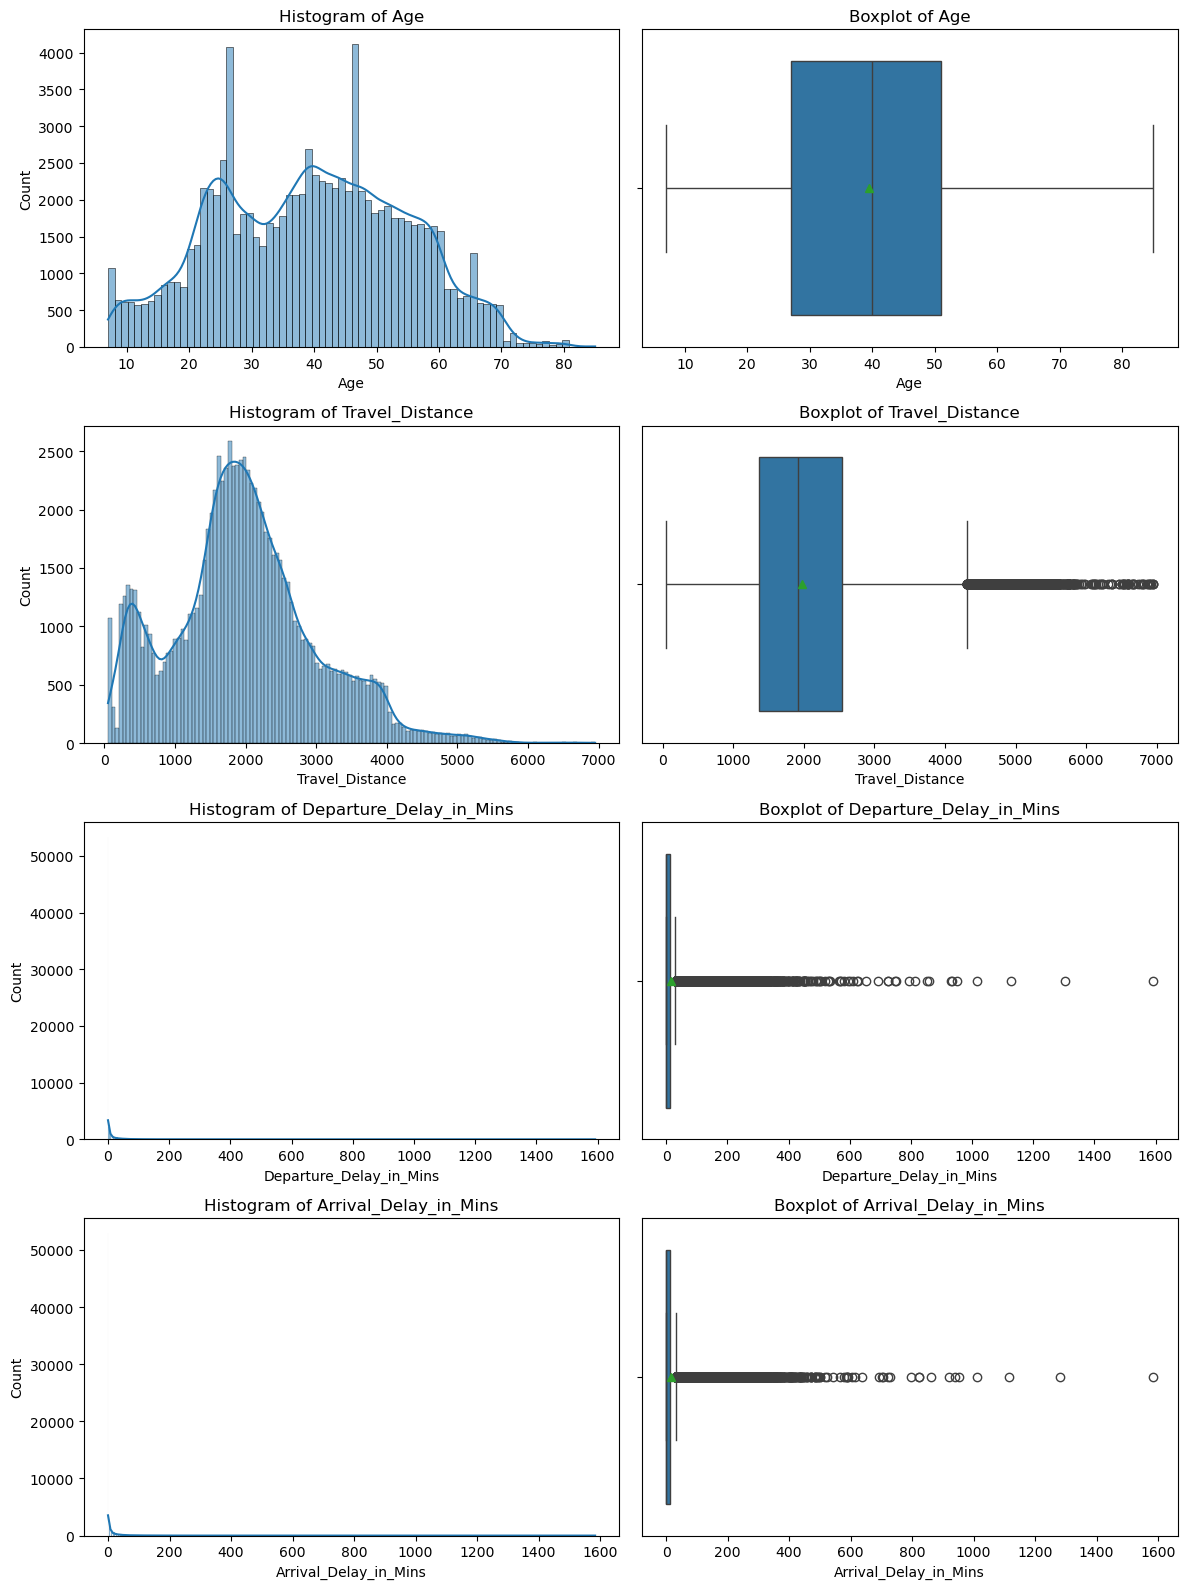

In [109]:
# Number of variables
num_vars = len(columns_num)

# Create subplots: 2 rows per variable (one for histogram, one for boxplot)
fig, axes = plt.subplots(num_vars, 2, figsize=(12, 4 * num_vars))

for i, var in enumerate(columns_num):
    # Histogram
    sns.histplot(df[var], ax=axes[i, 0], kde=True)
    axes[i, 0].set_title(f'Histogram of {var}')
    
    # Boxplot
    sns.boxplot(x=df[var], ax=axes[i, 1],showmeans=True)
    axes[i, 1].set_title(f'Boxplot of {var}')

# Adjust layout
plt.tight_layout()
plt.show()

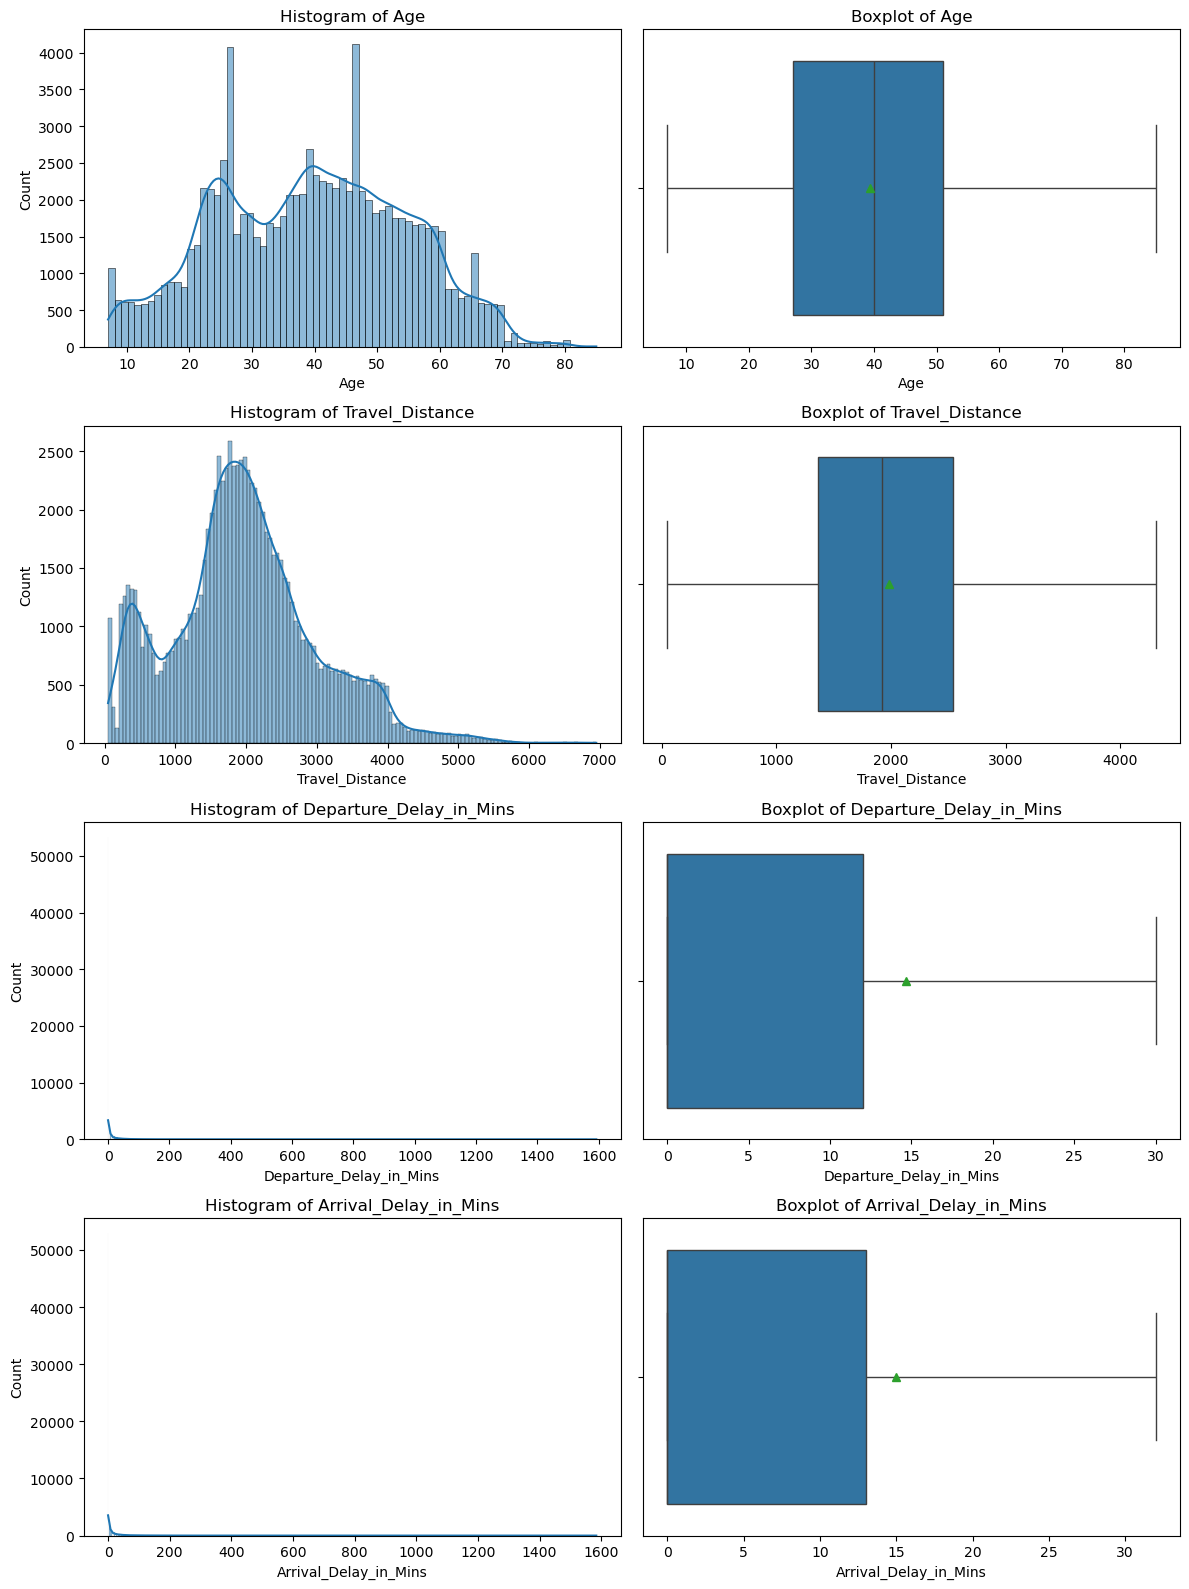

In [110]:
# Number of variables
num_vars = len(columns_num)

# Create subplots: 2 rows per variable (one for histogram, one for boxplot)
fig, axes = plt.subplots(num_vars, 2, figsize=(12, 4 * num_vars))

for i, var in enumerate(columns_num):
    # Histogram
    sns.histplot(df[var], ax=axes[i, 0], kde=True)
    axes[i, 0].set_title(f'Histogram of {var}')
    
    # Boxplot
    sns.boxplot(x=df[var], ax=axes[i, 1],showmeans=True,showfliers=False)
    axes[i, 1].set_title(f'Boxplot of {var}')

# Adjust layout
plt.tight_layout()
plt.show()

In [111]:
#Computing basic statistic of each numerical varibles 
#combination of basic statisting and skewd
df_des=pd.concat([df.describe().T,df.select_dtypes(include="number").apply(lambda x:x.skew())],axis=1).rename(columns={0:"skew"})
#adding IQR to the statistics
df_des["IQR"]=df_des["75%"]-df_des["25%"]
df_des

,count,mean,std,min,25%,50%,75%,max,skew,IQR
ID,94379.0,9.884719e+07,27245.014865,98800001.0,98823595.5,98847190.0,98870784.5,98894379.0,0.000000,47189.0
Age,94346.0,3.941965e+01,15.116632,7.0,27.0,40.0,51.0,85.0,-0.002387,24.0
Travel_Distance,94379.0,1.978888e+03,1027.961019,50.0,1359.0,1923.0,2538.0,6951.0,0.473058,1179.0
Departure_Delay_in_Mins,94322.0,1.464709e+01,38.138781,0.0,0.0,0.0,12.0,1592.0,7.156803,12.0
Arrival_Delay_in_Mins,94022.0,1.500522e+01,38.439409,0.0,0.0,0.0,13.0,1584.0,6.979685,13.0


In [112]:
1592/60

26.533333333333335

In [113]:
600/60

10.0

In [114]:
#definiendo bigotes de la distribucion
low_whisk= df_des["25%"]-1.5*df_des["IQR"]
low_whisk.drop(labels=["ID"],inplace=True)
print(low_whisk)
upper_whisk= df_des["75%"]+1.5*df_des["IQR"]
upper_whisk.drop(labels=["ID"],inplace=True)
print(upper_whisk)

Age                         -9.0
Travel_Distance           -409.5
Departure_Delay_in_Mins    -18.0
Arrival_Delay_in_Mins      -19.5
dtype: float64
Age                          87.0
Travel_Distance            4306.5
Departure_Delay_in_Mins      30.0
Arrival_Delay_in_Mins        32.5
dtype: float64


In [115]:
#pocentaje de ouliers por varibles
pd.concat([((df[columns_num]<low_whisk)| (df[columns_num]>upper_whisk)).sum()/df.shape[0]*100,((df[columns_num]<low_whisk)| (df[columns_num]>upper_whisk)).sum()],axis=1).rename(columns={0:"porcentaje",1:"conteo"})

,porcentaje,conteo
Age,0.000000,0
Travel_Distance,2.041768,1927
Departure_Delay_in_Mins,13.907755,13126
Arrival_Delay_in_Mins,13.392810,12640


In [116]:
#Cantidad de usuarios que presentan alguna de esas medias aoutliers
df.loc[((df[columns_num]<low_whisk)| (df[columns_num]>upper_whisk)).any(axis=1),"ID"].nunique()

16500

#### Categoricas

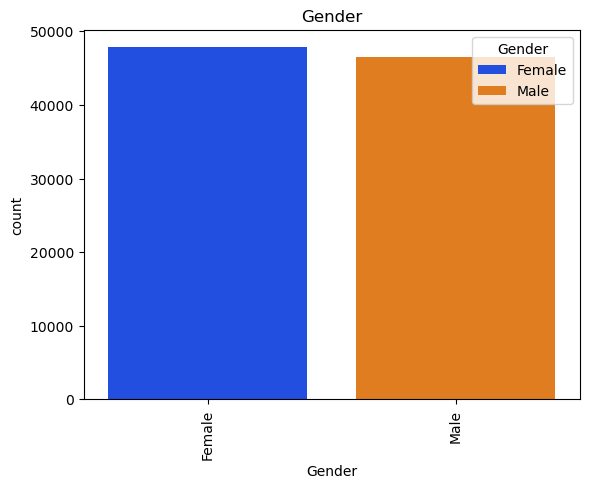

        count  proportion
Gender                   
Female  47815    0.507041
Male    46487    0.492959
------------------------------------------------------------


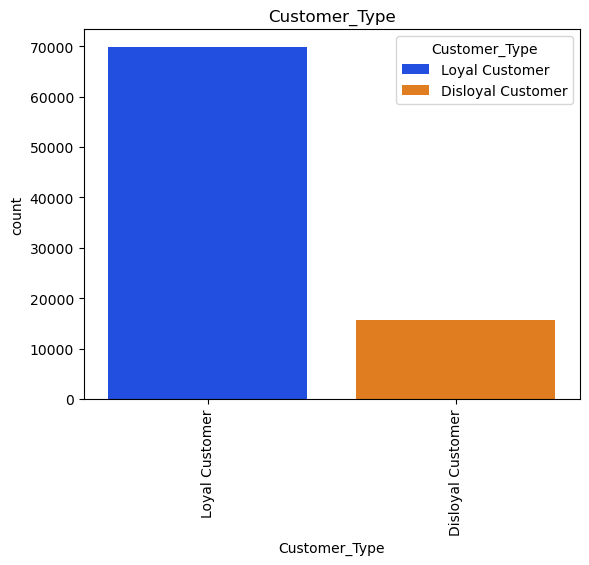

                   count  proportion
Customer_Type                       
Loyal Customer     69823    0.817332
Disloyal Customer  15605    0.182668
------------------------------------------------------------


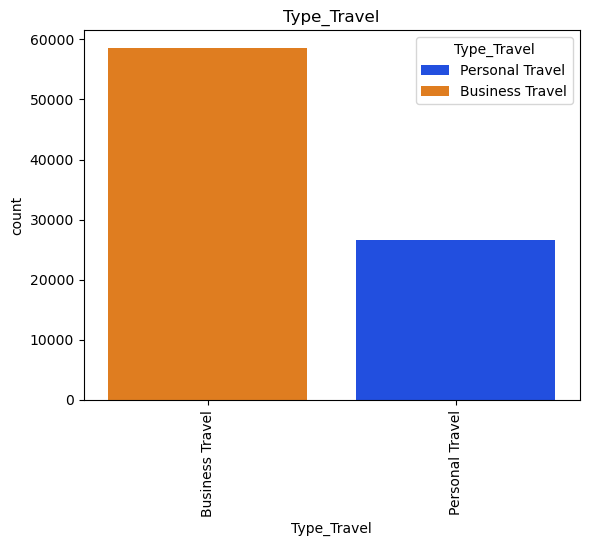

                 count  proportion
Type_Travel                       
Business Travel  58617    0.688373
Personal Travel  26536    0.311627
------------------------------------------------------------


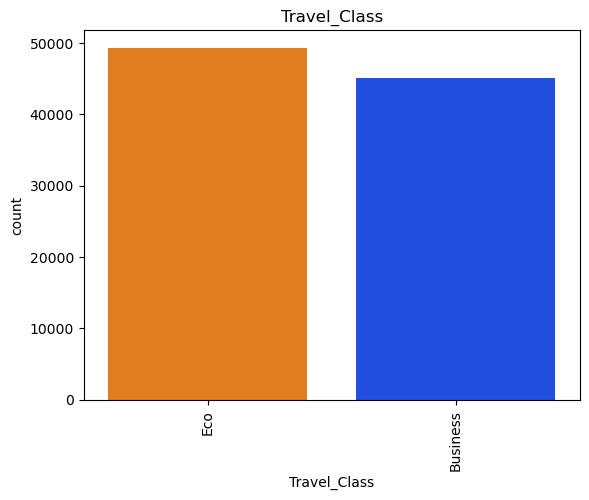

              count  proportion
Travel_Class                   
Eco           49342    0.522807
Business      45037    0.477193
------------------------------------------------------------


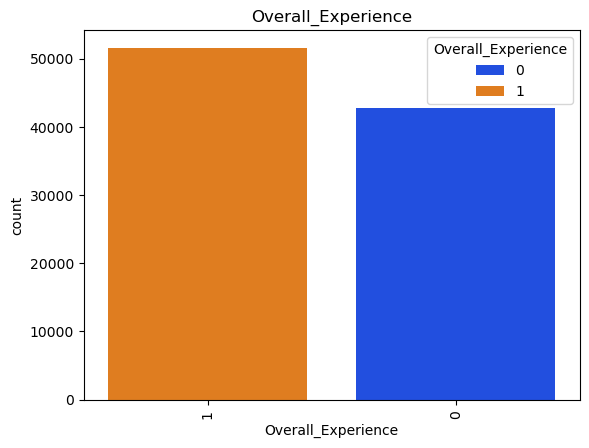

                    count  proportion
Overall_Experience                   
1                   51593    0.546658
0                   42786    0.453342
------------------------------------------------------------


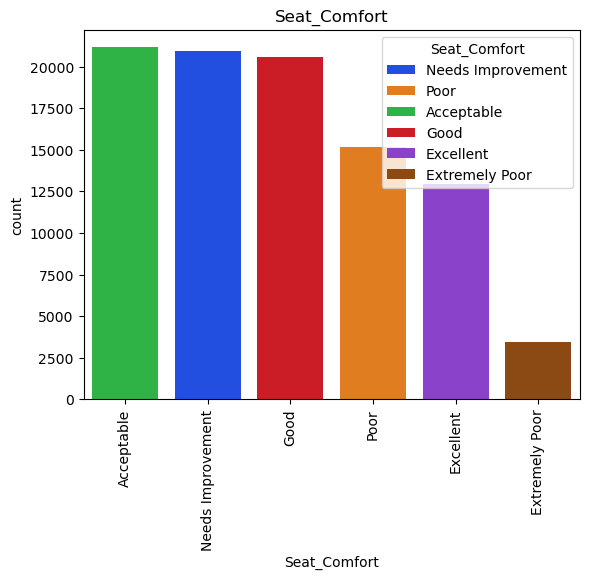

                   count  proportion
Seat_Comfort                        
Acceptable         21158    0.224326
Needs Improvement  20946    0.222079
Good               20595    0.218357
Poor               15185    0.160998
Excellent          12971    0.137524
Extremely Poor      3463    0.036716
------------------------------------------------------------


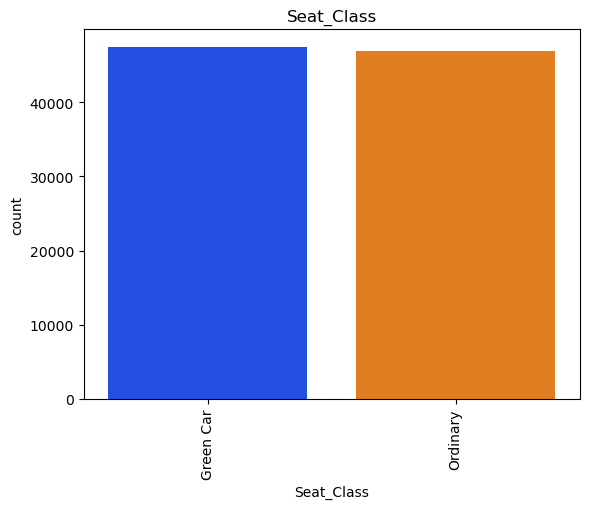

            count  proportion
Seat_Class                   
Green Car   47435    0.502601
Ordinary    46944    0.497399
------------------------------------------------------------


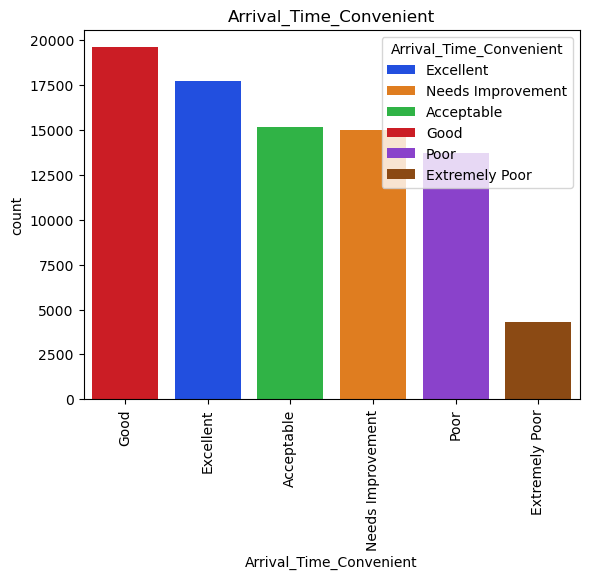

                         count  proportion
Arrival_Time_Convenient                   
Good                     19574    0.229072
Excellent                17684    0.206954
Acceptable               15177    0.177615
Needs Improvement        14990    0.175426
Poor                     13692    0.160236
Extremely Poor            4332    0.050697
------------------------------------------------------------


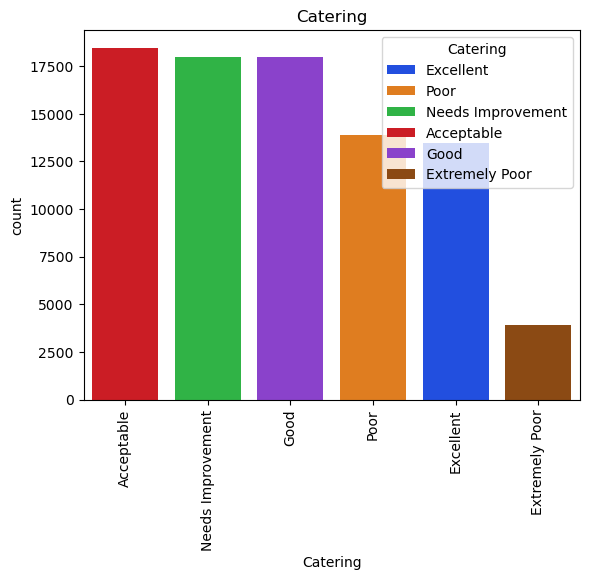

                   count  proportion
Catering                            
Acceptable         18468    0.215652
Needs Improvement  17978    0.209930
Good               17969    0.209825
Poor               13858    0.161821
Excellent          13455    0.157115
Extremely Poor      3910    0.045657
------------------------------------------------------------


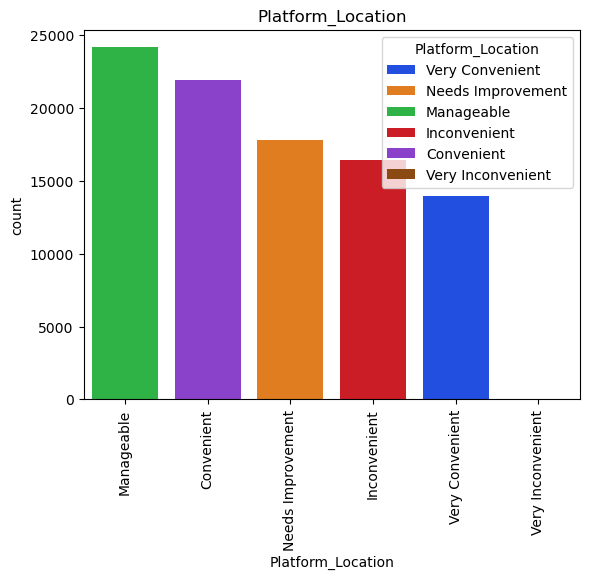

                   count  proportion
Platform_Location                   
Manageable         24173    0.256208
Convenient         21912    0.232244
Needs Improvement  17832    0.189000
Inconvenient       16449    0.174342
Very Convenient    13981    0.148184
Very Inconvenient      2    0.000021
------------------------------------------------------------


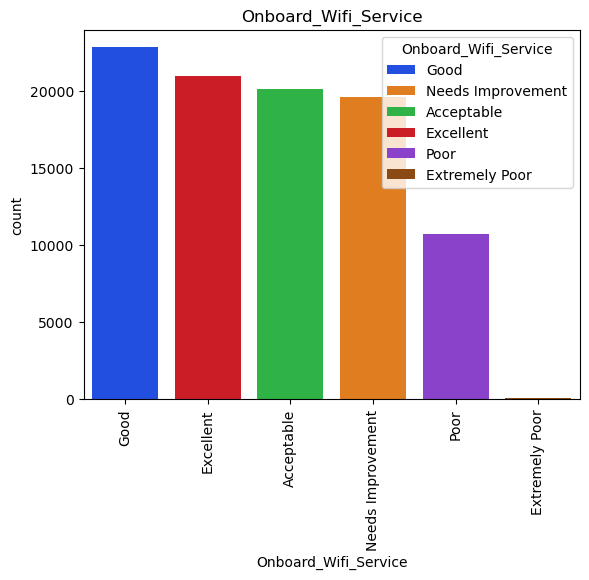

                      count  proportion
Onboard_Wifi_Service                   
Good                  22835    0.242027
Excellent             20968    0.222239
Acceptable            20118    0.213230
Needs Improvement     19596    0.207697
Poor                  10741    0.113843
Extremely Poor           91    0.000965
------------------------------------------------------------


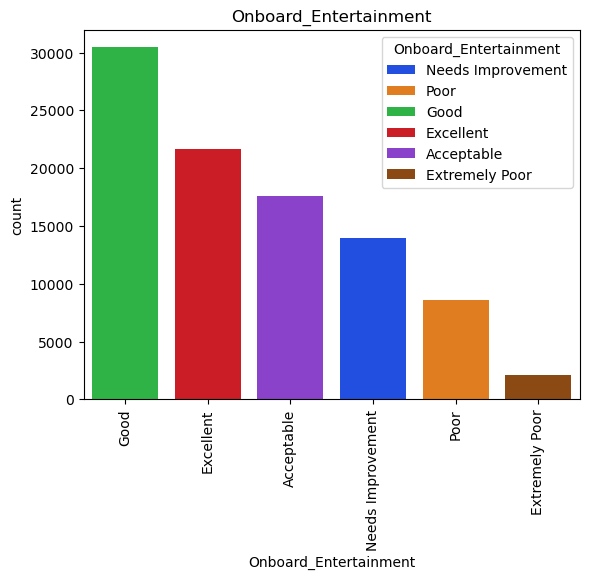

                       count  proportion
Onboard_Entertainment                   
Good                   30446    0.322654
Excellent              21644    0.229374
Acceptable             17560    0.186094
Needs Improvement      13926    0.147582
Poor                    8641    0.091574
Extremely Poor          2144    0.022721
------------------------------------------------------------


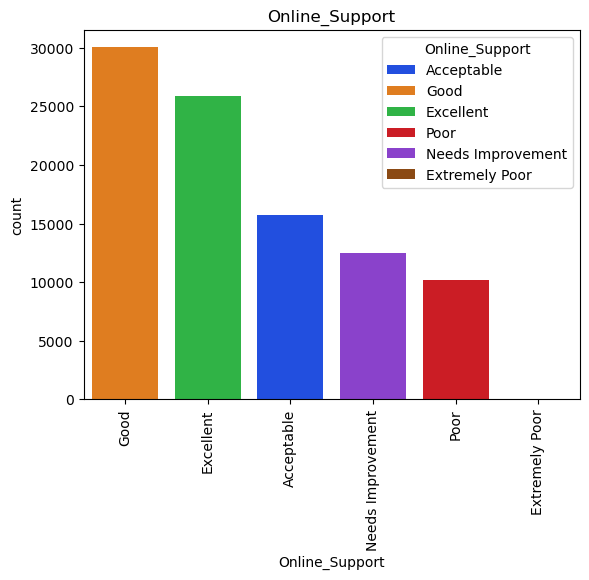

                   count  proportion
Online_Support                      
Good               30016    0.318344
Excellent          25894    0.274627
Acceptable         15702    0.166532
Needs Improvement  12508    0.132657
Poor               10167    0.107829
Extremely Poor         1    0.000011
------------------------------------------------------------


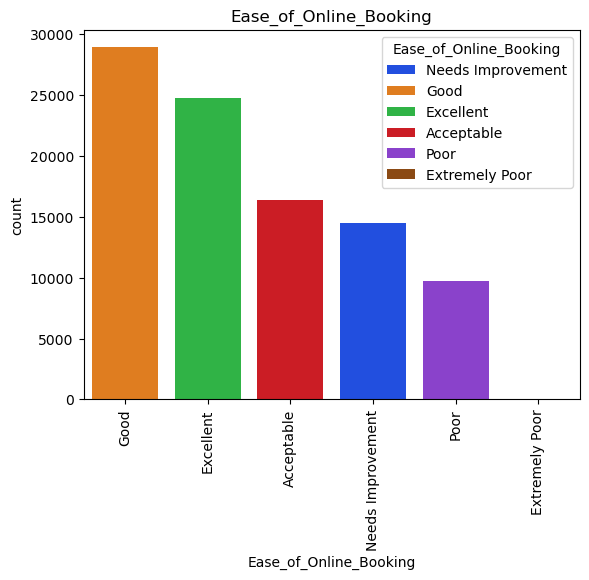

                        count  proportion
Ease_of_Online_Booking                   
Good                    28909    0.306545
Excellent               24744    0.262380
Acceptable              16390    0.173796
Needs Improvement       14479    0.153532
Poor                     9768    0.103578
Extremely Poor             16    0.000170
------------------------------------------------------------


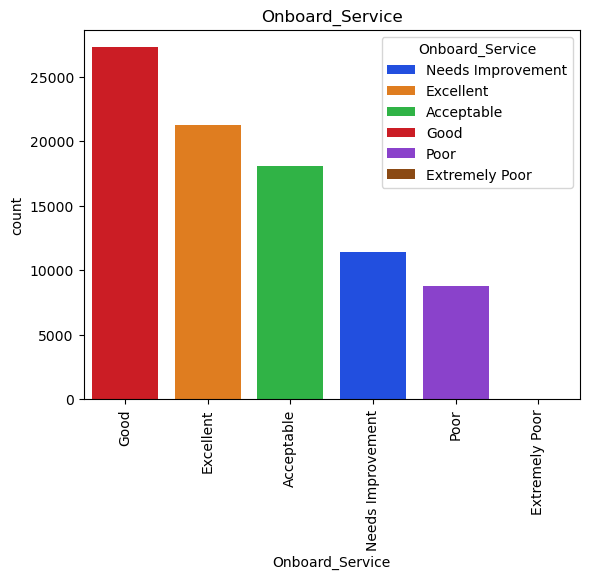

                   count  proportion
Onboard_Service                     
Good               27265    0.314193
Excellent          21272    0.245131
Acceptable         18071    0.208244
Needs Improvement  11390    0.131254
Poor                8776    0.101132
Extremely Poor         4    0.000046
------------------------------------------------------------


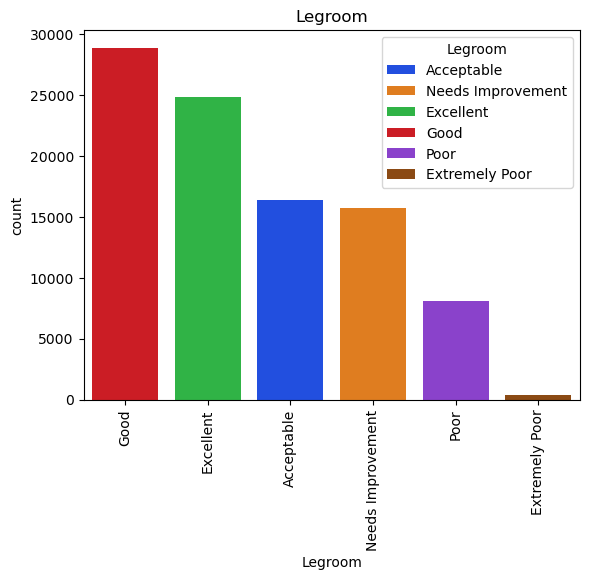

                   count  proportion
Legroom                             
Good               28870    0.306186
Excellent          24832    0.263361
Acceptable         16384    0.173764
Needs Improvement  15753    0.167071
Poor                8110    0.086012
Extremely Poor       340    0.003606
------------------------------------------------------------


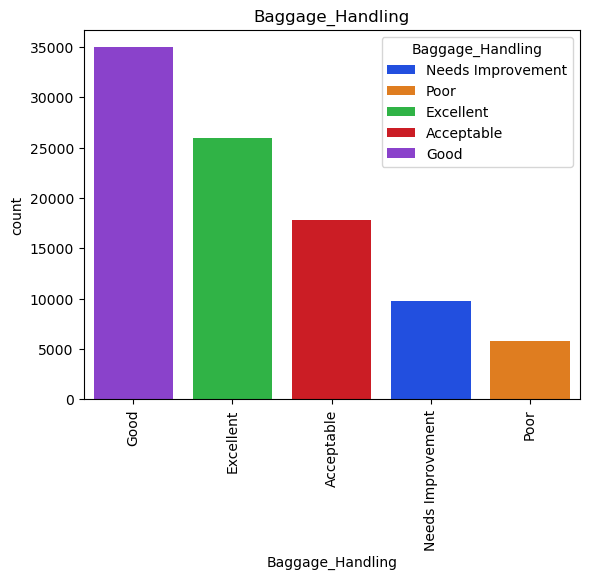

                   count  proportion
Baggage_Handling                    
Good               34944    0.370810
Excellent          26003    0.275932
Acceptable         17767    0.188535
Needs Improvement   9759    0.103558
Poor                5764    0.061165
------------------------------------------------------------


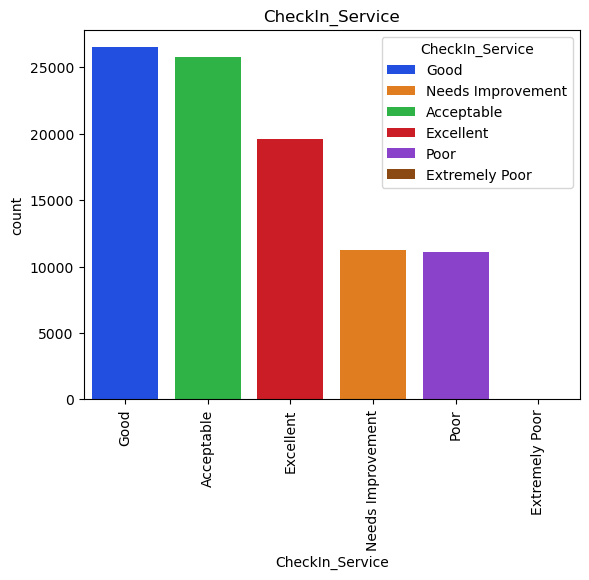

                   count  proportion
CheckIn_Service                     
Good               26502    0.281033
Acceptable         25803    0.273621
Excellent          19641    0.208278
Needs Improvement  11218    0.118958
Poor               11137    0.118099
Extremely Poor         1    0.000011
------------------------------------------------------------


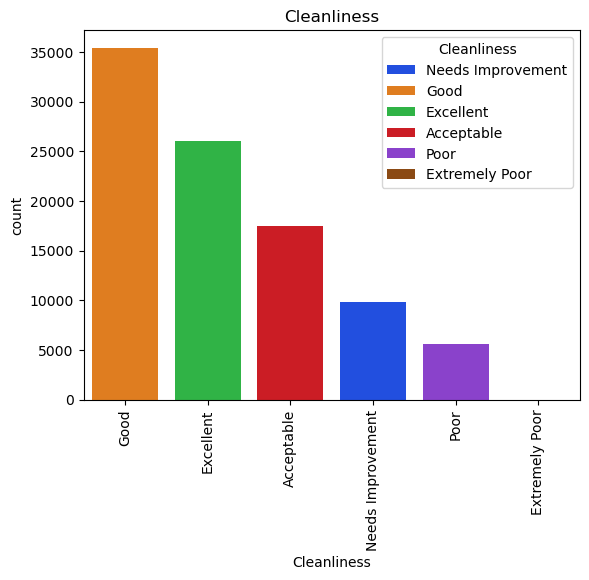

                   count  proportion
Cleanliness                         
Good               35427    0.375393
Excellent          26053    0.276064
Acceptable         17449    0.184894
Needs Improvement   9806    0.103907
Poor                5633    0.059689
Extremely Poor         5    0.000053
------------------------------------------------------------


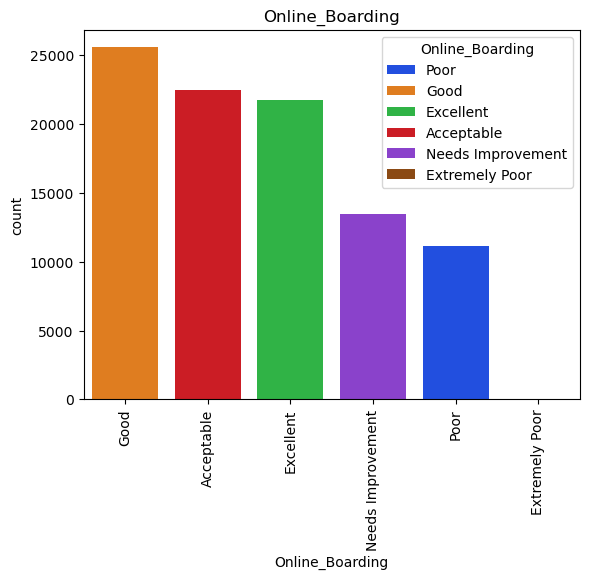

                   count  proportion
Online_Boarding                     
Good               25533    0.270554
Acceptable         22475    0.238151
Excellent          21742    0.230384
Needs Improvement  13451    0.142530
Poor               11160    0.118254
Extremely Poor        12    0.000127
------------------------------------------------------------


In [118]:
for k in columns_cat:
     
    sns.countplot(data=df,x=k,hue=k,palette="bright",order=df[k].value_counts().index)
    plt.xticks(rotation=90)
    plt.title(k)
    plt.show()
    print(pd.concat([df[k].value_counts(),df[k].value_counts(normalize=True)],axis=1))
    print("-"*60)

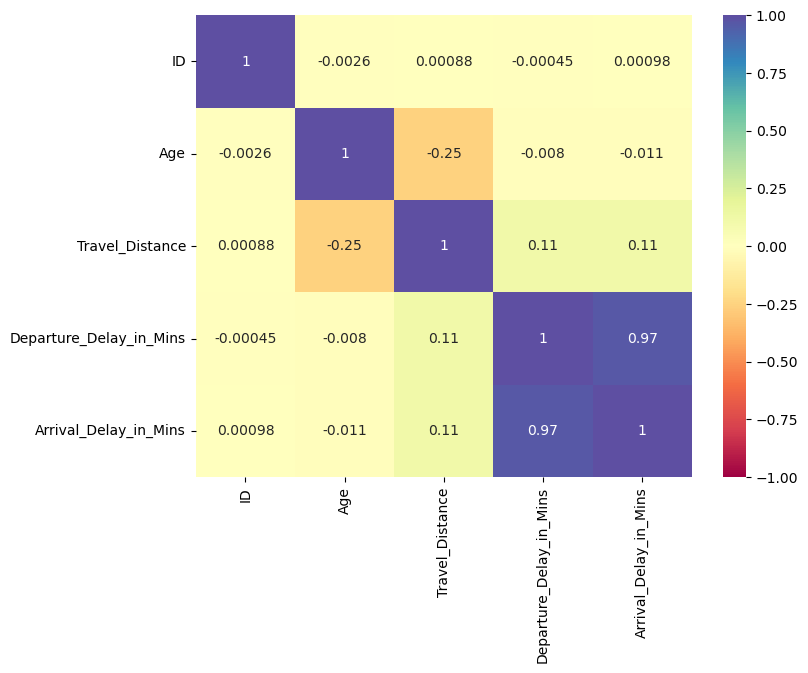

In [119]:
# Correlations
plt.figure(figsize=(8,6))
sns.heatmap(df.select_dtypes(include="number").corr(),annot=True,cmap='Spectral',vmin=-1,vmax=1)
plt.show()

In [127]:
columns_cat

Index(['Gender', 'Customer_Type', 'Type_Travel', 'Travel_Class',
       'Overall_Experience', 'Seat_Comfort', 'Seat_Class',
       'Arrival_Time_Convenient', 'Catering', 'Platform_Location',
       'Onboard_Wifi_Service', 'Onboard_Entertainment', 'Online_Support',
       'Ease_of_Online_Booking', 'Onboard_Service', 'Legroom',
       'Baggage_Handling', 'CheckIn_Service', 'Cleanliness',
       'Online_Boarding'],
      dtype='object')

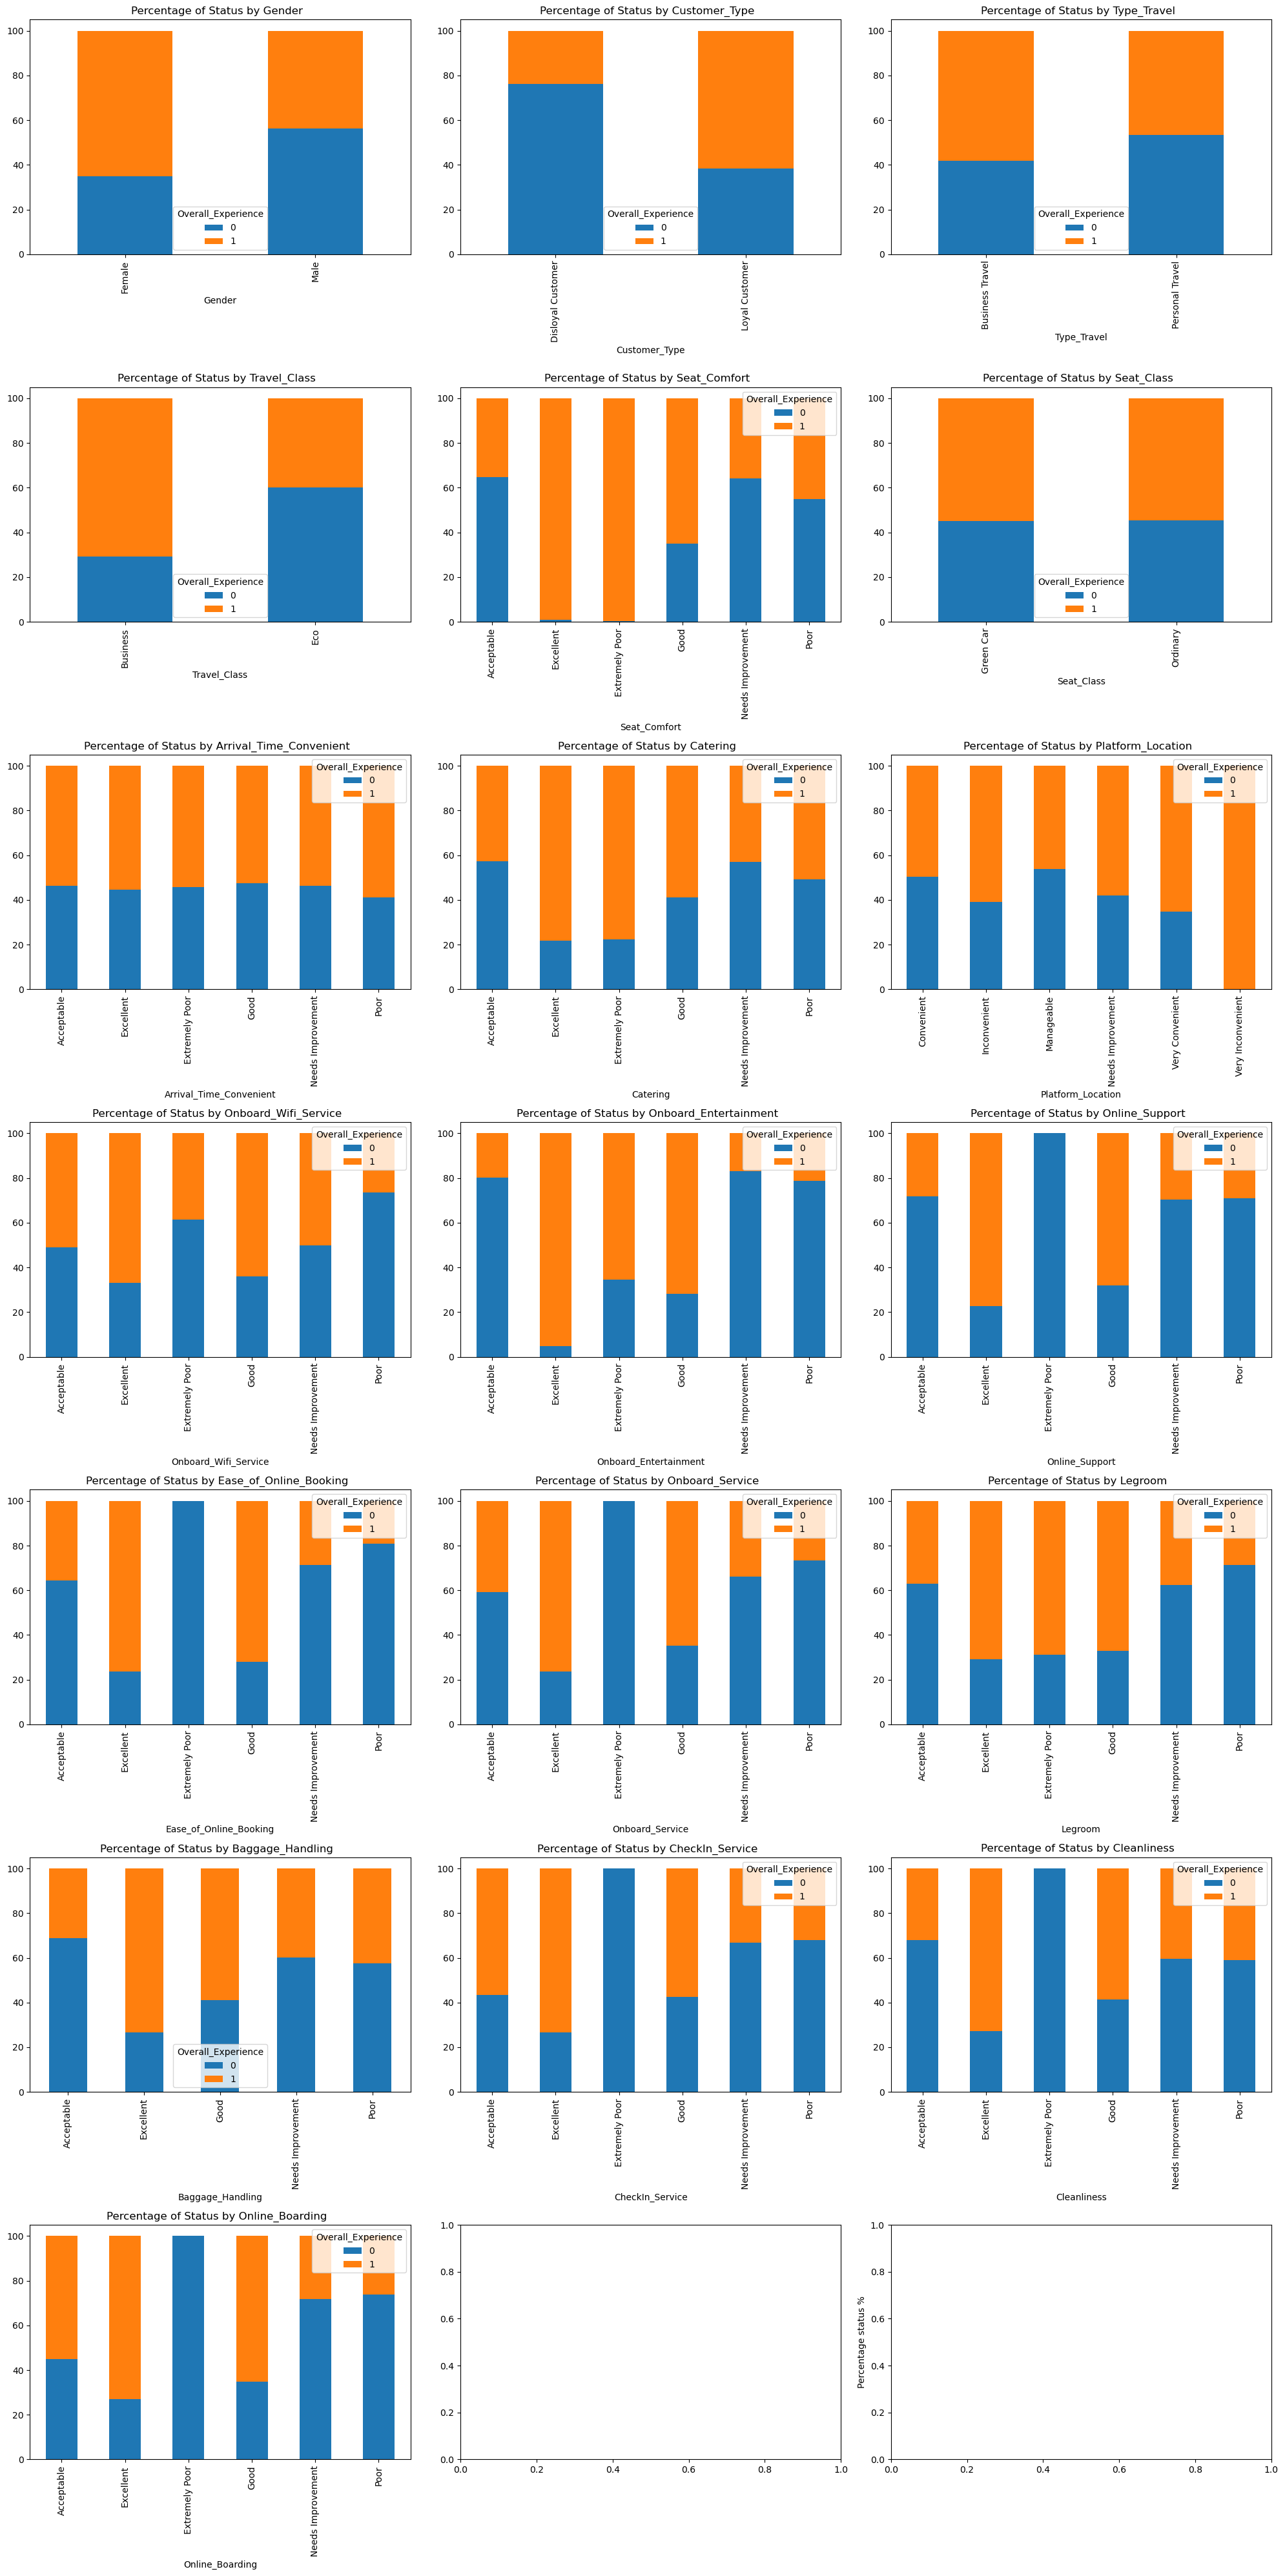

In [132]:
# Create a 3x3 grid of subplots
fig, axes = plt.subplots(7, 3, figsize=(15, 20))

# Plot each variable in a separate subplot
for i, var in enumerate(columns_cat[columns_cat!="Overall_Experience"]):
    row, col = divmod(i, 3)
    (pd.crosstab(df[var], df['Overall_Experience'], normalize = 'index')*100).plot(kind = 'bar',figsize = (20, 40), stacked = True, ax=axes[row, col])
    plt.ylabel('Percentage status %')
    axes[row, col].set_title(f'Percentage of Status by {var}  ')

# Adjust layout
plt.tight_layout()
plt.show()